# 1. Import Packages and Data

In [1]:
# used for performing logistic regression
from sklearn.linear_model import LogisticRegression

# used to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# used generate confusion matrix of classifiers
from sklearn.metrics import confusion_matrix

# standardize data
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
# used to work with dataframes
import pandas as pd

# used to work with arrays
import numpy as np

# used for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Read in csv file into pandas dataframe "churn_df"
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# Inspect head of churn data
pd.set_option('display.max_columns',50)
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# 2. Pre-processing

In [4]:
# List variables, null counts, and dtypes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### Rename survey columns

In [5]:
# Create dictionary for survey variables that need to be renamed
churn_item_cols = {'Item1': 'Timely_Response',
                         'Item2': 'Timely_Fixes',
                         'Item3': 'Timely_Replacements',
                         'Item4': 'Reliability',
                         'Item5': 'Options',
                         'Item6': 'Respectful_Response',
                         'Item7': 'Courteous_Exchange',
                         'Item8': 'Active_Listening'}

# Rename variables
churn_df.rename(columns=churn_item_cols, inplace=True)

#### Convert categorical (yes/no) fields to binary numeric (1/0)

In [6]:
# Create list of columns to convert
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']
# Run for loop iterating through columns to convert, pass dictionary through map function to convert yes/no to 1/0
for i in converted_columns:
    churn_df[i] = churn_df[i].map({'Yes':1, 'No':0})

#### Convert categorical data to numeric with dummy variables

In [1]:
# Use pandas get dummies for categorical fields "Area", "Marital", "Gender", "Contract"
categorical_conversions = ['Area', 'Marital', 'Gender', 'Contract']
dummy_variables = ['Area_Rural', 'Area_Suburban',
                    'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                    'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
                    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year']

churn_numeric = pd.get_dummies(churn_df, columns=categorical_conversions)

NameError: name 'pd' is not defined

In [8]:
# Create dataframe with only numeric variables
churn_numeric = churn_numeric[[
                            'Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
                            'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
                            'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
                            'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
                            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                            'Courteous_Exchange', 'Active_Listening', 'Area_Rural', 'Area_Suburban',
                            'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                            'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
                            'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year'
                            ]]

#### Display summary statistics

In [9]:
churn_numeric.describe()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Month-to-month,Contract_One year,Contract_Two Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,0.332700,0.334600,0.332700,0.209200,0.191100,0.195600,0.201400,0.202700,0.502500,0.474400,0.023100,0.545600,0.210200,0.244200
std,14432.698671,2.1472,20.698882,28199.916702,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,0.471204,0.471874,0.471204,0.406758,0.393187,0.396682,0.401066,0.402031,0.500019,0.499369,0.150229,0.497941,0.407471,0.429633
min,0.000000,0.0000,18.000000,348.670000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,738.000000,0.0000,35.000000,19224.717500,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2910.500000,1.0000,53.000000,33170.605000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,13168.000000,3.0000,71.000000,53246.170000,1.000000,11.969485,14.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,111850.000000,10.0000,89.000000,258900.700000,1.000000,21.207230,23.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

#### Visualize boxplots of continuous variables to investigate distribution of data and potential outliers

In [10]:
# Create dataframe of numeric non-binary variables
churn_anomaly_detect = churn_df[['Population', 'Children', 'Age', 
                         'Income', 'Outage_sec_perweek', 'Email', 
                         'Contacts', 'Yearly_equip_failure', 'Tenure', 
                         'MonthlyCharge', 'Bandwidth_GB_Year']]

# Normalize data by subtracting each value by its mean and then dividing by the standard deviation
churn_anomaly_detect_normalized = (churn_anomaly_detect - churn_anomaly_detect.mean())/churn_anomaly_detect.std()

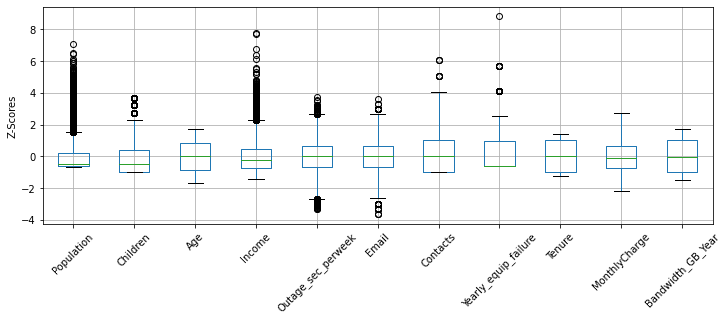

In [11]:
# Enlarge plot to fit all boxplots
fig, ax = plt.subplots(figsize=[12,4])

# Create boxplot of each variable
churn_anomaly_detect_normalized.boxplot()
# Rotate x labels
plt.xticks(rotation=45)
# Title y axis
plt.ylabel('Z-Scores')
plt.show()

# 3. Initial Logistic Regression Model

#### Define independent and dependent variables

In [12]:
X_all = churn_numeric.drop('Churn', axis=1).values
y = churn_numeric['Churn']

#### Normalize data

In [13]:
# Initialize standard scaler
scaler = StandardScaler() 
# Normalize and fit/ transform reduced dependent variables
X_norm_all = scaler.fit_transform(X_all)

#### Split data into training and testing data

In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_norm_all, y, random_state=13, test_size=.30)

#### Fit logistic regression model to training data and use model to predict on test data

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X1_train, y1_train)
y1_pred = log_reg.predict(X1_test)

# 4. Evaluate Initial Model

26.57 percent of the training data are churned customers.


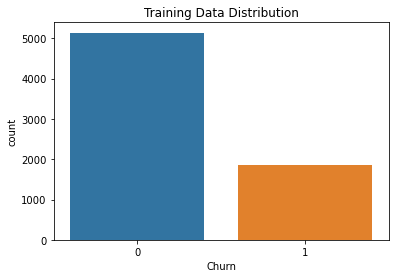

26.33 percent of the test data are churned customers.


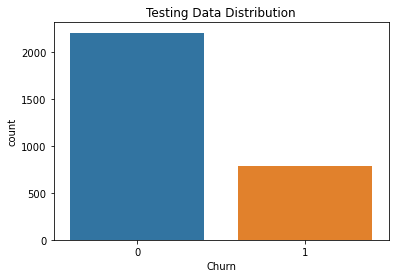

In [16]:
sns.countplot(x=y1_train)
print(str(round(np.sum(y1_train) / len(y1_train)*100,2)) + ' percent of the training data are churned customers.')
plt.title('Training Data Distribution')
plt.show()
sns.countplot(x=y1_test)
print(str(round(np.sum(y1_test) / len(y1_test)*100,2)) + ' percent of the test data are churned customers.')
plt.title('Testing Data Distribution')
plt.show()

#### Create confusion matrix

In [17]:
# Create confusion matrix
churn_log_matrix = confusion_matrix(y1_test, y1_pred)
# Print confusion_matrix
print(churn_log_matrix)

[[2080  130]
 [ 161  629]]


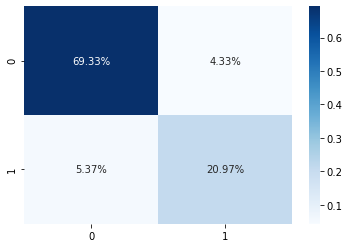

In [18]:
# Use seaborn to visualize confusion matrix as percentages
sns.heatmap(churn_log_matrix/np.sum(churn_log_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.show()

#### Display model accuracy

In [19]:
accuracy_score(y1_test, y1_pred)

0.903

#### Display model precision

In [20]:
precision_score(y1_test, y1_pred)

0.8287220026350461

#### Display model recall

In [21]:
recall_score(y1_test, y1_pred)

0.7962025316455696

#### Display classification report

In [22]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2210
           1       0.83      0.80      0.81       790

    accuracy                           0.90      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.90      0.90      0.90      3000



#### Run statsmodel logistic regression for summary statistics

In [23]:
import statsmodels.api as sm

Xc_norm_all = sm.add_constant(X_norm_all)
logistic_regression = sm.Logit(y, Xc_norm_all)
initial_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.220307
         Iterations 17


#### Run model summary

In [24]:
initial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9958
Method:                           MLE   Df Model:                           41
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.6190
Time:                        20:30:45   Log-Likelihood:                -2203.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1342      0.077    -40.874      0.000      -3.284      -2.984
x1            -0.0042      0.039     -0.109      0.914      -0.081       0.072
x2            -0.2099      0.041     -5.109      0.000      -0.290      -0.129
x3             0.2666      0.042      6.394      0.000       0.185       0.348
x4             0.0208      0.039      0.538      0.590      -0.055       0.096
x5            -0.0106      0.039     -0.273      0.785      -0.086       0.065
x6            -0.0262      0.038     -0.683      0.494      -0.101       0.049
x7             0.0534      0.038      1.401      0.161      -0.021       0.128
x8            -0.0234      0.039     -0.606      0.544      -0.099       0.052
x9             0.4080      0.038     10.698      0.000       0.333       0.483
x10            0.0653      0.038      1.700      0.089      -0.010       0.141
x11           -0.0196      0.039     -0.509      0.611      -0.095       0.056
x12           -0.0855      0.038     -2.226      0.026      -0.161      -0.010
x13            0.5072      0.060      8.423      0.000       0.389       0.625
x14           -0.2157      0.040     -5.445      0.000      -0.293      -0.138
x15            0.0994      0.050      1.982      0.048       0.001       0.198
x16           -0.0103      0.043     -0.240      0.810      -0.095       0.074
x17            0.0611      0.041      1.483      0.138      -0.020       0.142
x18            0.7985      0.078     10.273      0.000       0.646       0.951
x19            1.0411      0.088     11.811      0.000       0.868       1.214
x20            0.0767      0.038      1.992      0.046       0.001       0.152
x21          -11.0648      0.490    -22.572      0.000     -12.026     -10.104
x22            0.4828      0.112      4.325      0.000       0.264       0.702
x23            8.1480      0.460     17.719      0.000       7.247       9.049
x24           -0.0365      0.056     -0.647      0.517      -0.147       0.074
x25            0.0086      0.054      0.160      0.873      -0.096       0.114
x26            0.0328      0.048      0.683      0.495      -0.061       0.127
x27           -0.0261      0.043     -0.610      0.542      -0.110       0.058
x28           -0.0296      0.045     -0.656      0.512      -0.118       0.059
x29           -0.0244      0.046     -0.525      0.599      -0.115       0.067
x30            0.0028      0.044      0.062      0.950      -0.084       0.089
x31           -0.0097      0.041     -0.236      0.814      -0.091       0.071
x32            0.0020        nan        nan        nan         nan         nan
x33           -0.0237        nan        nan        nan         nan         nan
x34            0.0217        nan        nan        nan         nan         nan
x35           -0.0443   2.32e+06  -1.91e-08      1.000   -4.56e+06    4.56e+06
x36            0.0045   2.25e+06   2.01e-09      1.000    -4.4e+06     4.4e+06
x37           -0.0376   2.27e+06  -1.66e-08      1.000   -4.44e+06    4.44e+06
x3

# 5. Exploratory Data Analysis/ Feature Selection

#### Create correlation matrix to visualize relationships between variables

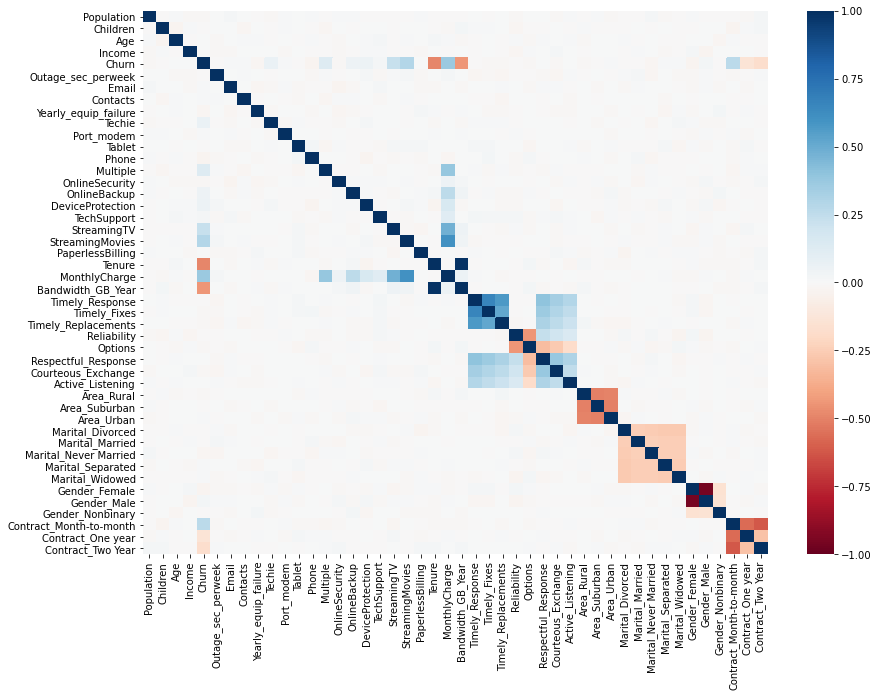

In [25]:
# Resize plot to read visualization more clearly
fig, ax = plt.subplots(figsize=(14,10))
# Create correlation from churn_numeric and use seaborn heatmap to visualize
# Change color scale to Red/ Blue and set scale minimum and maximum to -1/1
sns.heatmap(churn_numeric.corr(),cmap='RdBu', vmin=-1, vmax=1)
plt.show()

#### Convert and print correlation scores to r-squared 

In [26]:
# Loop through numeric data and print their r-squared scores for customer churn
for col in churn_numeric:
    print(col)
    print((str(round(churn_numeric[col].corr(churn_numeric['Churn'])**2,3))))
    print('-'*25)

Population
0.0
-------------------------
Children
0.0
-------------------------
Age
0.0
-------------------------
Income
0.0
-------------------------
Churn
1.0
-------------------------
Outage_sec_perweek
0.0
-------------------------
Email
0.0
-------------------------
Contacts
0.0
-------------------------
Yearly_equip_failure
0.0
-------------------------
Techie
0.004
-------------------------
Port_modem
0.0
-------------------------
Tablet
0.0
-------------------------
Phone
0.001
-------------------------
Multiple
0.017
-------------------------
OnlineSecurity
0.0
-------------------------
OnlineBackup
0.003
-------------------------
DeviceProtection
0.003
-------------------------
TechSupport
0.0
-------------------------
StreamingTV
0.053
-------------------------
StreamingMovies
0.084
-------------------------
PaperlessBilling
0.0
-------------------------
Tenure
0.236
-------------------------
MonthlyCharge
0.139
-------------------------
Bandwidth_GB_Year
0.195
-------------

#### Store and print r squared scores in descending order

In [27]:
# Convert r to r squared and store in variable "churn_r_sqr" in descending order
churn_r_sqr = (churn_numeric.corr()**2).sort_values(by='Churn', ascending=False)
# Round r squared scored and print
print(round(churn_r_sqr['Churn'],3))

Churn                      1.000
Tenure                     0.236
Bandwidth_GB_Year          0.195
MonthlyCharge              0.139
StreamingMovies            0.084
Contract_Month-to-month    0.072
StreamingTV                0.053
Contract_Two Year          0.032
Contract_One year          0.019
Multiple                   0.017
Techie                     0.004
DeviceProtection           0.003
OnlineBackup               0.003
Gender_Male                0.001
Gender_Female              0.001
Phone                      0.001
TechSupport                0.000
Marital_Never Married      0.000
Yearly_equip_failure       0.000
Area_Urban                 0.000
Marital_Separated          0.000
Options                    0.000
OnlineSecurity             0.000
Timely_Fixes               0.000
Email                      0.000
Timely_Replacements        0.000
Marital_Widowed            0.000
Area_Rural                 0.000
Courteous_Exchange         0.000
Contacts                   0.000
Population

#### Create list of reduced variables

In [28]:
# Create empty list
reduced_variables = []

# Iterate through churn_numeric
for f in churn_r_sqr:
    # Set conditional for r-squared to be higher than 0.05
    if churn_r_sqr[f][0] > 0.05:
        # Add feature to list of dependent variables
        reduced_variables.append(f)

#### Create reduced dataframe

In [29]:
# Use list of reduced variables to filter original dataframe into new, reduced dataframe
churn_reduced = churn_numeric[reduced_variables]
# Display head of reduced dataframe
churn_reduced.head()

,Churn,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,Contract_Month-to-month
0,0,0,1,6.795513,172.455519,904.536110,0
1,1,1,1,1.156681,242.632554,800.982766,1
2,0,0,1,15.754144,159.947583,2054.706961,0
3,0,1,0,17.087227,119.956840,2164.579412,0
4,1,1,0,1.670972,149.948316,271.493436,1


#### Visualize reduced variables 

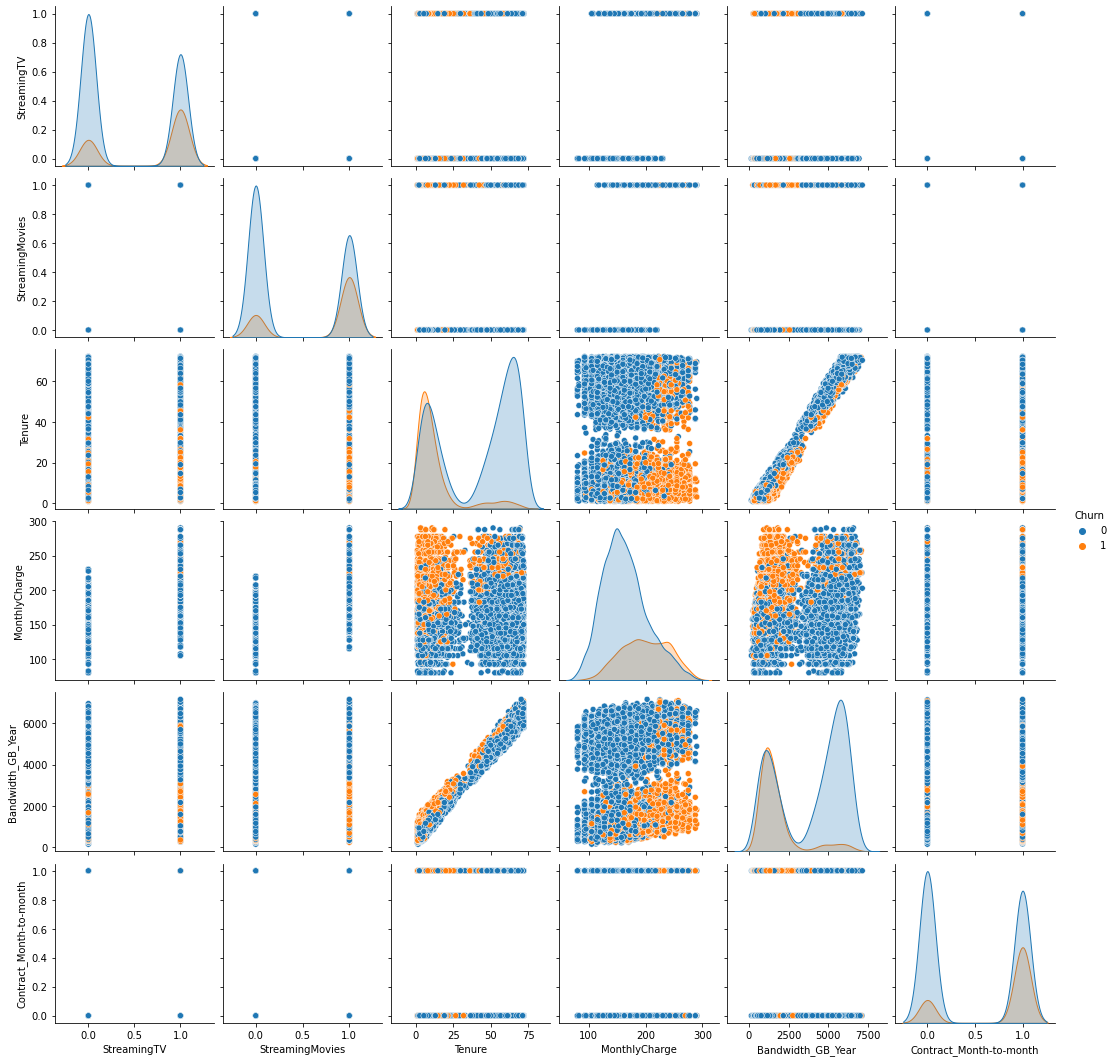

In [30]:
# Use pairplot to visualize the relationships of reduced dependent variables with each other and the 
# independent, predicted variable color coded
sns.pairplot(churn_reduced, hue='Churn')
plt.show()

#### Univariate analysis of distribution of reduced dependent variables

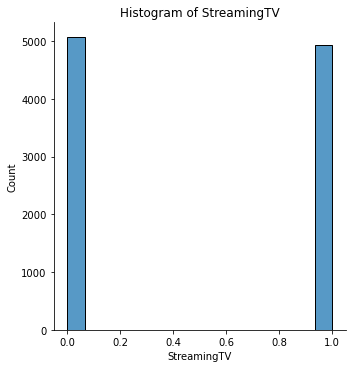

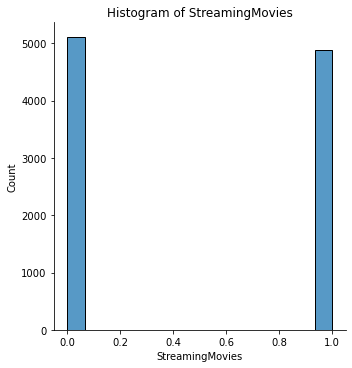

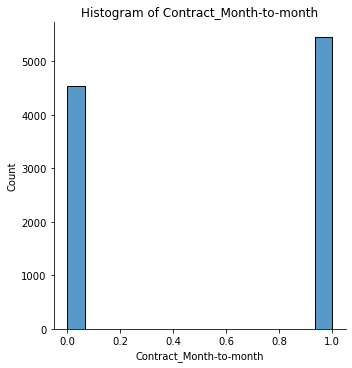

In [31]:
# Iterate through first three reduced variables
for f in ['StreamingTV', 'StreamingMovies', 'Contract_Month-to-month']:
    # Use seaborn displot to show distribution of data with customer churn
    sns.displot(churn_reduced,x=f)
    # Add title to each plot
    plt.title('Histogram of '+f)
    plt.show()

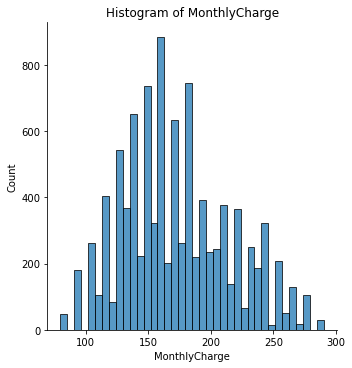

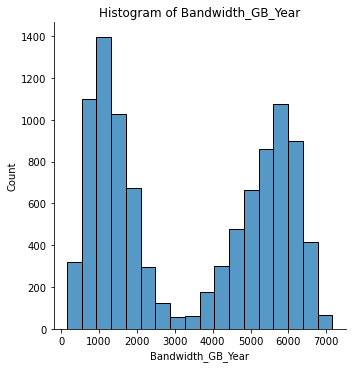

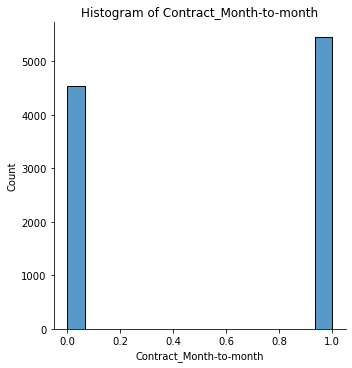

In [32]:
# Iterate through first three reduced variables
for f in ['MonthlyCharge', 'Bandwidth_GB_Year', 'Contract_Month-to-month']:
    # Use seaborn displot to show distribution of data with customer churn
    sns.displot(churn_reduced,x=f)
    # Add title to each plot
    plt.title('Histogram of '+f)
    plt.show()   

#### Adding cusomter churn to previous plots

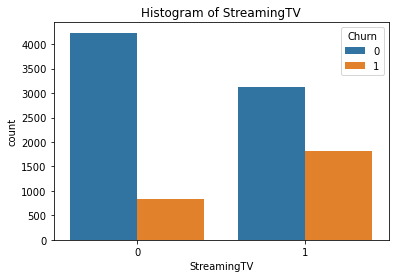

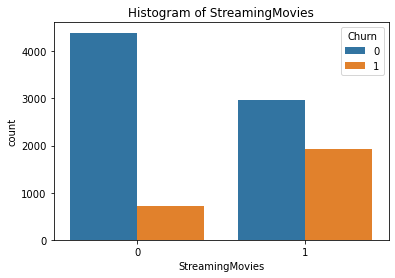

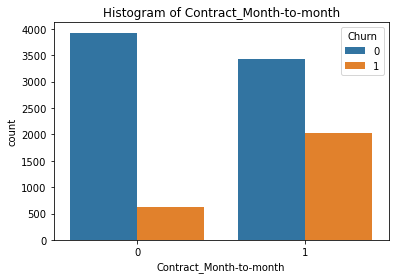

In [33]:
# Iterate through first three reduced variables
for f in ['StreamingTV', 'StreamingMovies', 'Contract_Month-to-month']:
    # Use seaborn displot to show distribution of data with customer churn
    sns.countplot(data=churn_reduced, x=f, hue='Churn')
    # Add title to each plot
    plt.title('Histogram of '+f)
    plt.show()    

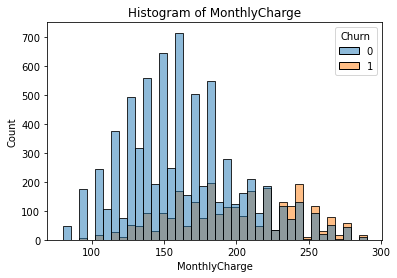

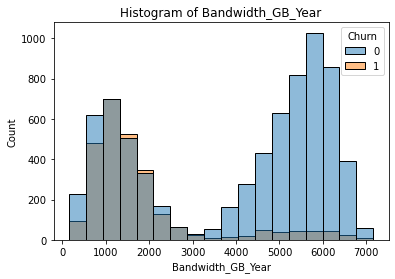

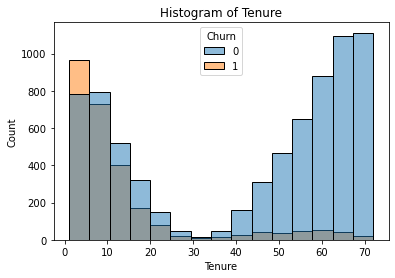

In [34]:
# Iterate through first three reduced variables
for f in ['MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']:
    # Use seaborn displot to show distribution of data with customer churn
    sns.histplot(x=churn_reduced[f], hue=churn_reduced['Churn'])
    # Add title to each plot
    plt.title('Histogram of '+f)
    plt.show()    

#### Visualize distribution of churn with previous histograms

#### Visualize relationship between Tenure and Bandwidth_GB_Year

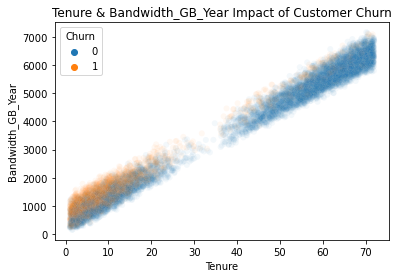

In [35]:
# Use seaborn scatterplot to visualize relationship between Bandwidth_GB_Year, Tenure, and Churn
sns.scatterplot(x='Tenure', y='Bandwidth_GB_Year', data=churn_reduced, hue='Churn', alpha=0.05)
# Add title to plot
plt.title('Tenure & Bandwidth_GB_Year Impact of Customer Churn')
plt.show()

# 6. Additional Feature Selection

#### Re-test feature importance of all variables with decision tree classifer and entropy

In [36]:
# Import decision tree classifer from sklearn
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree classifier
dtc = DecisionTreeClassifier(random_state=13, criterion='entropy', max_depth=10)
# Fit data to decision tree classifier
dtc.fit(X_all,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=13)

#### Display feature importance scores from decision tree classifer

In [38]:
# Create empty list to add features to
churn_features = []
# Create empty list to add feature importance scores to
churn_feature_scores = []
# Print title
print('Feature Importance Scores')
print('='*50+'\n')
# Iterate through enumerated list
for i, column in enumerate(churn_numeric.drop('Churn', axis=1)):
    # Print column and feature importance scores
    print('{} --- {}'.format(column, dtc.feature_importances_[i]))
    # Append features and scores to empty lists above for sorting
    churn_features.append(column)
    churn_feature_scores.append(dtc.feature_importances_[i])

Feature Importance Scores

Population --- 0.029244688844731265
Children --- 0.006938468715807137
Age --- 0.009264302219383111
Income --- 0.018146076177991247
Outage_sec_perweek --- 0.020770567092558208
Email --- 0.014888204346742467
Contacts --- 0.003405055090414469
Yearly_equip_failure --- 0.0023608876823532866
Techie --- 0.008043578018368138
Port_modem --- 0.0011975763654180226
Tablet --- 0.0028770390979022385
Phone --- 0.0005759792874305912
Multiple --- 0.014410020220922169
OnlineSecurity --- 0.0022389194153656965
OnlineBackup --- 0.0005036622247929339
DeviceProtection --- 0.003761057305943853
TechSupport --- 0.0006151186971589793
StreamingTV --- 0.015710823543635625
StreamingMovies --- 0.008434558537585884
PaperlessBilling --- 0.001873561690190461
Tenure --- 0.34443923681316124
MonthlyCharge --- 0.25637610204678146
Bandwidth_GB_Year --- 0.0405843925673727
Timely_Response --- 0.003992677330508577
Timely_Fixes --- 0.0027560788253247195
Timely_Replacements --- 0.008400542357096577
Rel

#### Display feature importance scores from decision tree classfier in descending order

In [39]:
# Create dataframe with pandas and zip function from churn feature lists
churn_feature_scores_df = pd.DataFrame(zip(churn_features, churn_feature_scores), columns=['Feature', 'Feature Importance'])
# Sort and display dataframe in descending order by feature importance score
churn_feature_scores_df.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
20,Tenure,0.344439
21,MonthlyCharge,0.256376
42,Contract_Month-to-month,0.138813
22,Bandwidth_GB_Year,0.040584
0,Population,0.029245
4,Outage_sec_perweek,0.020771
3,Income,0.018146
17,StreamingTV,0.015711
5,Email,0.014888
12,Multiple,0.014410


# 7. Reduced Logistic Regression Model

#### Reduce features to the dependent variables with the highest feature importance

In [40]:
# Reduce features to the dependent variables with the highest feature importance
# Extract only values from dependent variables to match dimensions of independent variable
X_reduced = churn_reduced[['Tenure', 'MonthlyCharge', 'Contract_Month-to-month']].values
y = churn_numeric['Churn']

#### Normalize data

In [41]:
# Initialize standard scaler
scaler = StandardScaler() 
# Normalize and fit/ transform reduced dependent variables
X_norm_reduced = scaler.fit_transform(X_reduced)

#### Split data into training and testing data

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_norm_reduced, y, random_state=13, test_size=.30)

#### Fit logistic regression model to training data and use model to predict on test data

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X2_train, y2_train)
y2_pred = log_reg.predict(X2_test)

# 8. Evaluate Model

#### Ensure training and testing data samples are distributed evenly

26.57 percent of the training data are churned customers.


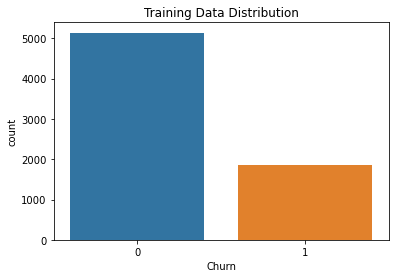

26.33 percent of the test data are churned customers.


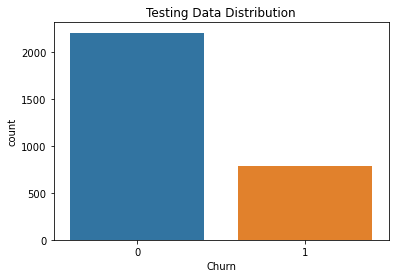

In [44]:
sns.countplot(x=y2_train)
print(str(round(np.sum(y2_train) / len(y2_train)*100,2)) + ' percent of the training data are churned customers.')
plt.title('Training Data Distribution')
plt.show()
sns.countplot(x=y2_test)
print(str(round(np.sum(y2_test) / len(y2_test)*100,2)) + ' percent of the test data are churned customers.')
plt.title('Testing Data Distribution')
plt.show()

#### Print predictions

In [45]:
# Print independent test values and model predictions
for prediction in zip(X2_test, y2_pred):
    print(prediction)

(array([ 0.83604829, -1.34233221, -1.0957665 ]), 0)
(array([-1.19792306, -1.28412029, -1.0957665 ]), 0)
(array([-1.09153802,  1.33858911, -1.0957665 ]), 1)
(array([-1.20238223,  1.04440447,  0.91260319]), 1)
(array([0.82250077, 0.64058866, 0.91260319]), 0)
(array([-1.14175824, -0.76127609,  0.91260319]), 1)
(array([-1.12272682,  0.22873701,  0.91260319]), 1)
(array([-1.18244993,  1.92195771,  0.91260319]), 1)
(array([ 1.38900546, -0.81871544, -1.0957665 ]), 0)
(array([-1.18425591,  0.69440785, -1.0957665 ]), 1)
(array([ 0.60726343, -1.2844667 ,  0.91260319]), 0)
(array([ 1.29718549, -0.4102475 ,  0.91260319]), 0)
(array([-0.81742158, -1.40121911, -1.0957665 ]), 0)
(array([ 0.82129926,  1.63022217, -1.0957665 ]), 0)
(array([ 1.30586305, -0.00326067, -1.0957665 ]), 0)
(array([ 0.73934702, -0.0026645 , -1.0957665 ]), 0)
(array([-1.21317804, -0.52740491, -1.0957665 ]), 0)
(array([1.04807632, 0.93223104, 0.91260319]), 0)
(array([-0.66593269, -0.76050992,  0.91260319]), 0)
(array([-1.2428592

(array([ 0.39753707, -0.00352848, -1.0957665 ]), 0)
(array([-1.20412369,  0.17095067, -1.0957665 ]), 0)
(array([-0.87576717,  1.22309561,  0.91260319]), 1)
(array([ 0.85395483, -0.12036102,  0.91260319]), 0)
(array([-0.9630885 , -0.76057513, -1.0957665 ]), 0)
(array([-0.73102026, -0.29397387, -1.0957665 ]), 0)
(array([ 0.71379877, -0.52808608, -1.0957665 ]), 0)
(array([-0.64851218,  0.22905773,  0.91260319]), 1)
(array([-1.23939111,  1.10634458, -1.0957665 ]), 1)
(array([ 0.27845678, -0.06172934,  0.91260319]), 0)
(array([-1.24843278,  0.87359936,  0.91260319]), 1)
(array([-1.17011977, -0.58535074, -1.0957665 ]), 0)
(array([-1.20782783,  0.57891559,  0.91260319]), 1)
(array([-1.26357314, -0.06257468,  0.91260319]), 1)
(array([-0.7509989 ,  0.28752705,  0.91260319]), 1)
(array([ 0.94847697, -1.05220587, -1.0957665 ]), 0)
(array([ 1.39106622, -1.28438752, -1.0957665 ]), 0)
(array([ 1.15448005,  1.45577562, -1.0957665 ]), 0)
(array([-0.86080839,  0.4086748 , -1.0957665 ]), 0)
(array([ 0.8

(array([-0.88819516,  0.11704315,  0.91260319]), 1)
(array([ 0.84896423, -0.5270847 , -1.0957665 ]), 0)
(array([ 1.31466694,  0.11704408, -1.0957665 ]), 0)
(array([ 0.89675685,  0.46184086, -1.0957665 ]), 0)
(array([ 1.31085403, -0.52713826, -1.0957665 ]), 0)
(array([-1.12660406,  0.22865084,  0.91260319]), 1)
(array([-1.06503145,  0.28733842,  0.91260319]), 1)
(array([ 1.01810703,  0.93255242, -1.0957665 ]), 0)
(array([ 0.51212445, -0.99384199,  0.91260319]), 0)
(array([-1.01332211,  0.81210561,  0.91260319]), 1)
(array([1.26815411, 0.52009295, 0.91260319]), 0)
(array([1.09295649, 0.11324352, 0.91260319]), 0)
(array([-1.11873021, -0.23618767,  0.91260319]), 1)
(array([1.38711413, 1.68953386, 0.91260319]), 0)
(array([-1.16661538, -2.1575201 , -1.0957665 ]), 0)
(array([-1.15280309, -1.57569688,  0.91260319]), 0)
(array([ 0.98238851,  0.17095067, -1.0957665 ]), 0)
(array([ 0.92804072, -0.58560693,  0.91260319]), 0)
(array([-0.89791737, -0.29514059,  0.91260319]), 1)
(array([-1.08511273, 

(array([ 1.32470637, -1.80834359, -1.0957665 ]), 0)
(array([1.1216456 , 0.40758728, 0.91260319]), 0)
(array([ 1.34204789, -1.34309838,  0.91260319]), 0)
(array([ 0.79542653, -1.28515136, -1.0957665 ]), 0)
(array([-0.96770783,  0.28768909,  0.91260319]), 1)
(array([-0.39530017, -0.06257392,  0.91260319]), 0)
(array([-1.14865337,  1.62981538,  0.91260319]), 1)
(array([ 1.08447634, -0.23669753,  0.91260319]), 0)
(array([-1.00905136, -0.993155  ,  0.91260319]), 0)
(array([1.19036423, 1.57169529, 0.91260319]), 0)
(array([1.02919027, 0.17127205, 0.91260319]), 0)
(array([ 0.42121932, -0.58560693,  0.91260319]), 0)
(array([ 1.15853803, -0.003943  ,  0.91260319]), 0)
(array([ 0.91615459, -1.40122006, -1.0957665 ]), 0)
(array([0.99698286, 0.87283319, 0.91260319]), 0)
(array([ 0.88845029,  1.63032697, -1.0957665 ]), 0)
(array([-0.67581739, -0.00420848,  0.91260319]), 1)
(array([ 1.30102222, -0.29397387, -1.0957665 ]), 0)
(array([-1.0736599 ,  0.05503819, -1.0957665 ]), 0)
(array([ 0.75271074, -0.

(array([-0.81053356, -0.58611694,  0.91260319]), 0)
(array([-0.97404651,  0.34972177, -1.0957665 ]), 0)
(array([-1.13702194, -0.00320711, -1.0957665 ]), 0)
(array([-1.17917942, -1.86697504, -1.0957665 ]), 0)
(array([-0.99938656,  0.22865084,  0.91260319]), 1)
(array([ 1.15267722,  0.34895793, -1.0957665 ]), 0)
(array([-0.76313138, -1.22540121,  0.91260319]), 0)
(array([ 0.90404646, -1.86697504, -1.0957665 ]), 0)
(array([-1.24618333, -0.5270847 ,  0.91260319]), 1)
(array([-0.67169437, -0.003943  ,  0.91260319]), 1)
(array([-1.04180654,  1.27735031, -1.0957665 ]), 1)
(array([-0.50822631,  0.05477252, -1.0957665 ]), 0)
(array([0.6753535 , 0.98603983, 0.91260319]), 0)
(array([ 0.56269299, -0.70264441, -1.0957665 ]), 0)
(array([-1.26566264, -0.99248897,  0.91260319]), 0)
(array([-0.78259897, -1.34275165,  0.91260319]), 0)
(array([-1.18669783, -0.29483784, -1.0957665 ]), 0)
(array([-0.77158113, -0.52724306, -1.0957665 ]), 0)
(array([-0.94655827,  0.11704408, -1.0957665 ]), 0)
(array([-1.1253

(array([-0.95818877,  1.92153198,  0.91260319]), 1)
(array([ 0.44299171, -0.81836146,  0.91260319]), 0)
(array([ 1.26907614, -1.05127668,  0.91260319]), 0)
(array([-0.33422528,  0.05474224,  0.91260319]), 0)
(array([-0.95169027,  0.05433704, -1.0957665 ]), 0)
(array([ 1.37377613, -0.993155  , -1.0957665 ]), 0)
(array([-1.1533571 , -0.81836146,  0.91260319]), 1)
(array([-1.26354421,  1.39790079, -1.0957665 ]), 1)
(array([-0.95080799,  1.92195771, -1.0957665 ]), 1)
(array([ 0.88939728, -0.7608965 ,  0.91260319]), 0)
(array([ 1.14920695, -0.003943  ,  0.91260319]), 0)
(array([-1.26532476, -0.00320732,  0.91260319]), 1)
(array([ 1.13739041, -0.58576995,  0.91260319]), 0)
(array([-0.92090867,  0.87392073,  0.91260319]), 1)
(array([ 0.35870831, -1.34275139,  0.91260319]), 0)
(array([-1.15177273,  0.46216274,  0.91260319]), 1)
(array([-0.91382253, -0.00391506, -1.0957665 ]), 0)
(array([-1.16440093,  1.57169529,  0.91260319]), 1)
(array([-0.61130988, -0.52748514, -1.0957665 ]), 0)
(array([ 0.8

(array([ 1.23053632,  0.58228767, -1.0957665 ]), 0)
(array([ 0.92060891, -0.46842042, -1.0957665 ]), 0)
(array([ 1.37142984, -1.57566428,  0.91260319]), 0)
(array([ 1.25539247, -0.99248897,  0.91260319]), 0)
(array([ 0.96239928, -1.51671123, -1.0957665 ]), 0)
(array([ 0.58861186, -0.7608965 , -1.0957665 ]), 0)
(array([-1.06169502, -0.52776471, -1.0957665 ]), 0)
(array([ 1.17233743,  2.67851298, -1.0957665 ]), 0)
(array([ 0.92005676, -0.2370189 , -1.0957665 ]), 0)
(array([0.47658897, 0.0584124 , 0.91260319]), 0)
(array([-1.08872497,  1.92163633, -1.0957665 ]), 1)
(array([-1.01225931, -1.57569749, -1.0957665 ]), 0)
(array([-1.25372311,  1.45628563, -1.0957665 ]), 1)
(array([-1.17432841, -0.00388711,  0.91260319]), 1)
(array([ 0.83103879,  1.16446626, -1.0957665 ]), 0)
(array([-0.34274476,  0.22905838,  0.91260319]), 0)
(array([-1.0081288 ,  2.38688225,  0.91260319]), 1)
(array([-0.9393311 ,  0.81471384, -1.0957665 ]), 0)
(array([-0.80140822,  0.17053149, -1.0957665 ]), 0)
(array([-1.0552

(array([-0.99377286, -1.28411971,  0.91260319]), 0)
(array([-1.0916289 , -0.00359368,  0.91260319]), 1)
(array([ 1.21396517, -0.75964595,  0.91260319]), 0)
(array([ 0.13396251, -1.10922836, -1.0957665 ]), 0)
(array([-1.12248198,  1.16497626,  0.91260319]), 1)
(array([1.29153268, 0.93146488, 0.91260319]), 0)
(array([ 1.26931591,  1.97975801, -1.0957665 ]), 0)
(array([-0.45942656, -0.58611649, -1.0957665 ]), 0)
(array([-1.2244562 ,  0.17095067, -1.0957665 ]), 0)
(array([0.83854018, 0.34605394, 0.91260319]), 0)
(array([-1.13106118, -0.46845302,  0.91260319]), 1)
(array([-1.10054492,  1.98007839, -1.0957665 ]), 1)
(array([ 1.197554  , -0.52808608, -1.0957665 ]), 0)
(array([ 0.77492334, -0.58576995,  0.91260319]), 0)
(array([ 1.19063652, -1.1099922 , -1.0957665 ]), 0)
(array([-0.55824212,  0.64026766,  0.91260319]), 1)
(array([1.26644545, 0.40835345, 0.91260319]), 0)
(array([ 0.43557201,  0.75347392, -1.0957665 ]), 0)
(array([-0.55111572,  0.46146201, -1.0957665 ]), 0)
(array([ 1.12450396, 

(array([ 0.97700006,  0.40758728, -1.0957665 ]), 0)
(array([-1.15170418,  2.21275707,  0.91260319]), 1)
(array([ 1.40463   , -0.46969892,  0.91260319]), 0)
(array([ 0.68189694, -1.05146764, -1.0957665 ]), 0)
(array([-1.09995438,  1.39757027,  0.91260319]), 1)
(array([ 1.24843226, -0.87734247,  0.91260319]), 0)
(array([-1.12192096, -0.00282742,  0.91260319]), 1)
(array([ 1.15404967, -0.58560693, -1.0957665 ]), 0)
(array([ 0.80367675, -1.34309838,  0.91260319]), 0)
(array([-1.18116681, -0.29481921, -1.0957665 ]), 0)
(array([-1.13177652,  0.46184086,  0.91260319]), 1)
(array([-0.67038584,  1.68885253, -1.0957665 ]), 1)
(array([-1.22396293,  0.87359936, -1.0957665 ]), 1)
(array([ 0.35581099, -0.29481921, -1.0957665 ]), 0)
(array([0.81924758, 1.92195771, 0.91260319]), 1)
(array([ 1.34282885, -0.06172934, -1.0957665 ]), 0)
(array([-0.83849957,  1.16446626,  0.91260319]), 1)
(array([ 1.36644227,  0.46146127, -1.0957665 ]), 0)
(array([ 0.85278509,  0.87402553, -1.0957665 ]), 0)
(array([-0.6879

(array([ 1.08009841,  1.04435014, -1.0957665 ]), 0)
(array([-1.11950136,  0.81210491, -1.0957665 ]), 1)
(array([-0.50778269,  0.055038  ,  0.91260319]), 1)
(array([ 1.22279288,  1.33858911, -1.0957665 ]), 0)
(array([-0.96385982,  0.57899943, -1.0957665 ]), 0)
(array([ 1.1122907 , -0.99275445,  0.91260319]), 0)
(array([-1.15006015, -0.35260555,  0.91260319]), 1)
(array([ 0.44967357, -1.34275139, -1.0957665 ]), 0)
(array([ 1.10464634,  2.38720362, -1.0957665 ]), 0)
(array([-0.76308396,  1.92195771,  0.91260319]), 1)
(array([-0.87358614,  0.28742226,  0.91260319]), 1)
(array([ 0.64706414, -0.4699644 ,  0.91260319]), 0)
(array([-1.0464508 , -0.70264431,  0.91260319]), 0)
(array([-1.26321228, -0.81871099, -1.0957665 ]), 0)
(array([-1.09306591, -0.81836146, -1.0957665 ]), 0)
(array([ 1.15032715,  1.86332602, -1.0957665 ]), 0)
(array([1.02247059, 1.86300465, 0.91260319]), 0)
(array([ 0.36644834,  2.09557055, -1.0957665 ]), 0)
(array([ 0.92615204,  0.22973839, -1.0957665 ]), 0)
(array([-0.9719

(array([-0.65765104, -0.062414  , -1.0957665 ]), 0)
(array([-0.92064507, -0.81939544, -1.0957665 ]), 0)
(array([ 1.35401306, -1.226522  ,  0.91260319]), 0)
(array([-1.14718341,  0.75309433,  0.91260319]), 1)
(array([-1.02782539, -0.52776471, -1.0957665 ]), 0)
(array([-0.77410894,  0.40835396, -1.0957665 ]), 0)
(array([-0.64987207,  1.92153198,  0.91260319]), 1)
(array([ 1.16977594,  0.69998652, -1.0957665 ]), 0)
(array([ 1.30896005,  1.63032697, -1.0957665 ]), 0)
(array([-1.18119125,  0.46258188, -1.0957665 ]), 0)
(array([-0.43648557,  0.81471384,  0.91260319]), 1)
(array([-0.82867004, -0.41101367, -1.0957665 ]), 0)
(array([-0.88689919, -1.86697504,  0.91260319]), 0)
(array([ 0.54896318,  1.45588042, -1.0957665 ]), 0)
(array([-0.57409792,  0.28728253,  0.91260319]), 1)
(array([-1.1225482 , -0.29439989,  0.91260319]), 1)
(array([ 0.4235588 , -1.05182162,  0.91260319]), 0)
(array([-0.23212664, -0.23659346,  0.91260319]), 0)
(array([-0.87291853, -0.8183616 ,  0.91260319]), 0)
(array([0.76

(array([-1.20195517, -1.57569749, -1.0957665 ]), 0)
(array([ 1.02508275,  1.86300465, -1.0957665 ]), 0)
(array([-1.1892901 , -1.57534291, -1.0957665 ]), 0)
(array([ 1.1461387,  1.6299008, -1.0957665]), 0)
(array([-1.02710267, -0.41063175,  0.91260319]), 1)
(array([ 0.59959033,  0.64091935, -1.0957665 ]), 0)
(array([ 0.49420544, -0.81871078, -1.0957665 ]), 0)
(array([-1.24512311, -0.81836146, -1.0957665 ]), 0)
(array([ 1.06033496,  0.22921674, -1.0957665 ]), 0)
(array([-0.96113424, -0.75980896,  0.91260319]), 0)
(array([-0.68438339,  0.17127205,  0.91260319]), 1)
(array([ 1.21296599, -0.76057513, -1.0957665 ]), 0)
(array([ 0.47842584, -0.7608965 ,  0.91260319]), 0)
(array([ 0.41863174, -0.23617356,  0.91260319]), 0)
(array([-0.506664 ,  1.9214477, -1.0957665]), 1)
(array([-1.21348547,  1.68844674,  0.91260319]), 1)
(array([0.42033587, 0.87283319, 0.91260319]), 0)
(array([ 1.28675425, -0.8188738 ,  0.91260319]), 0)
(array([ 0.4685131 , -0.52713826,  0.91260319]), 0)
(array([-0.84162456, 

(array([-1.12242748,  1.10303538,  0.91260319]), 1)
(array([-1.00228985, -0.35292692,  0.91260319]), 1)
(array([-0.47307204, -0.23653918, -1.0957665 ]), 0)
(array([ 1.26424741, -0.99206979,  0.91260319]), 0)
(array([-1.01063915, -0.70194345, -1.0957665 ]), 0)
(array([ 0.37594885, -0.58571173,  0.91260319]), 0)
(array([-0.89225965, -0.46945439,  0.91260319]), 1)
(array([ 1.36396551, -0.17790749,  0.91260319]), 0)
(array([-1.14606925, -0.99318937, -1.0957665 ]), 0)
(array([ 1.16611204, -0.70220893,  0.91260319]), 0)
(array([1.4005932 , 0.34895793, 0.91260319]), 0)
(array([-0.8057249 ,  0.46184191,  0.91260319]), 1)
(array([ 0.64657173, -0.58603077,  0.91260319]), 0)
(array([-0.80689575, -0.23669753, -1.0957665 ]), 0)
(array([0.94612917, 1.86332602, 0.91260319]), 0)
(array([1.26223317, 1.86332602, 0.91260319]), 0)
(array([-1.19807057, -0.29448387,  0.91260319]), 1)
(array([ 1.19074393,  1.16446626, -1.0957665 ]), 0)
(array([ 1.27676096, -0.29372003, -1.0957665 ]), 0)
(array([-1.00011637, 

(array([ 1.29025175, -1.86697504,  0.91260319]), 0)
(array([-1.16083002,  1.98016322, -1.0957665 ]), 1)
(array([1.03063382, 0.93146488, 0.91260319]), 0)
(array([1.34126882, 1.39724874, 0.91260319]), 0)
(array([-1.12159818, -0.81803078, -1.0957665 ]), 0)
(array([ 1.21692072, -0.81871544, -1.0957665 ]), 0)
(array([-0.60709423, -1.05136285,  0.91260319]), 0)
(array([1.17643738, 1.39724874, 0.91260319]), 0)
(array([ 0.46453266, -0.58560693,  0.91260319]), 0)
(array([ 0.17361232,  0.52028391, -1.0957665 ]), 0)
(array([1.26185423, 0.28736869, 0.91260319]), 0)
(array([-0.96532814,  0.57859411, -1.0957665 ]), 0)
(array([ 1.40014429,  0.75303844, -1.0957665 ]), 0)
(array([-1.04132878,  0.2292169 ,  0.91260319]), 1)
(array([-0.7762132 , -0.35260555, -1.0957665 ]), 0)
(array([ 1.3460272 , -0.76015595,  0.91260319]), 0)
(array([-0.87379789,  0.34895686,  0.91260319]), 1)
(array([ 1.02430897, -1.86620934,  0.91260319]), 0)
(array([ 1.39893068, -0.00391506, -1.0957665 ]), 0)
(array([-0.51535769,  0.

#### Create confusion matrix

In [46]:
# Create confusion matrix
churn_log_matrix = confusion_matrix(y2_test, y2_pred)
# Print confusion_matrix
print(churn_log_matrix)

[[2053  157]
 [ 200  590]]


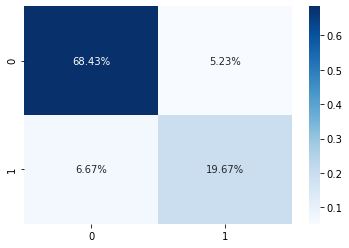

In [47]:
# Use seaborn to visualize confusion matrix as percentages
sns.heatmap(churn_log_matrix/np.sum(churn_log_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.show()

#### Display model accuracy

In [48]:
accuracy_score(y2_test, y2_pred)

0.881

#### Display model precision

In [49]:
precision_score(y2_test, y2_pred)

0.7898259705488622

#### Display model recall

In [50]:
recall_score(y2_test, y2_pred)

0.7468354430379747

#### Display classification report

In [51]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2210
           1       0.79      0.75      0.77       790

    accuracy                           0.88      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.88      0.88      0.88      3000



#### Run statsmodel logistic regression for summary statistics

In [52]:
# Add constant values
Xc_norm_reduced = sm.add_constant(X_norm_reduced)
# Run/ fit logistic model
reduced_model = sm.Logit(y, Xc_norm_reduced).fit()

Optimization terminated successfully.
         Current function value: 0.272237
         Iterations 8


#### Run Model Summary

In [53]:
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.5292
Time:                        20:43:34   Log-Likelihood:                -2722.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5120      0.058    -43.022      0.000      -2.626      -2.398
x1            -2.4090      0.058    -41.382      0.000      -2.523      -2.295
x2             1.8259      0.048     38.089      0.000       1.732       1.920
x3             1.3449      0.042     31.752      0.000       1.262       1.428
==============================================================================
"""

#### Export cleaned dataset

In [54]:
churn_numeric.to_csv('churn_data_clean.csv')

#### Reduced Model Equation:
    
 f(x) = b0 + b1x1 + b2x2 + b3x3
 
 y = -2.5120 - 2.4090(Normalized Tenure) + 1.8259(Normalized MonthlyCharge) + 1.3449(Normalized Contract-Month-to-month)

<b>General Resources</b> - Data 360 YP. December 17, 2019. Youtube.

https://www.youtube.com/watch?v=tODN7x3BO_E

---------------------------------------------------------------------------------------------------------------------

<b>General Resources</b> - Data 360 YP. December 24, 2019. Youtube.

https://www.youtube.com/watch?v=NPdn3YPkg9w

---------------------------------------------------------------------------------------------------------------------

<b>Feature Selection</b> - Asaithambi, Sudharsan. January 31, 2018. Toward Data Science.

https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

---------------------------------------------------------------------------------------------------------------------

<b>Feature Selection</b> - T., Sam. January 10, 2019. Towards Data Science.

https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

---------------------------------------------------------------------------------------------------------------------

<b>Feature Selection</b> - Asaithambi, Sudharsan. January 31, 2018. Towards Data Science.

https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

---------------------------------------------------------------------------------------------------------------------

<b>Evaluating Model</b> - Adams, Scott. June 16, 2020. LevelUp.

https://levelup.gitconnected.com/an-introduction-to-logistic-regression-in-python-with-statsmodels-and-scikit-learn-1a1fb5ce1c13

---------------------------------------------------------------------------------------------------------------------

<b>Confusion Matrix</b> - T., Dennis. July 25, 2019. Medium.

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea